<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [3]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [4]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [5]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [6]:
npR

array([[-0.9711, -1.1261, -1.1017, -0.6529, -0.8688],
       [ 0.    ,  0.6996,  0.2412,  0.0641,  0.5344],
       [ 0.    ,  0.    , -0.7003,  0.0044, -0.3234],
       [ 0.    ,  0.    ,  0.    , -0.5882, -0.0299],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.4413]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [7]:
import numpy as np

def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

In [8]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

False

Check if Q is unitary:

In [9]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [10]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [11]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]

        for i in range(j + 1, n):
            R[j, i] = np.dot(Q[:, j], V[:, i])
            V[:, i] -= R[j, i] * Q[:, j]
    return Q, R

In [12]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [13]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [15]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [16]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

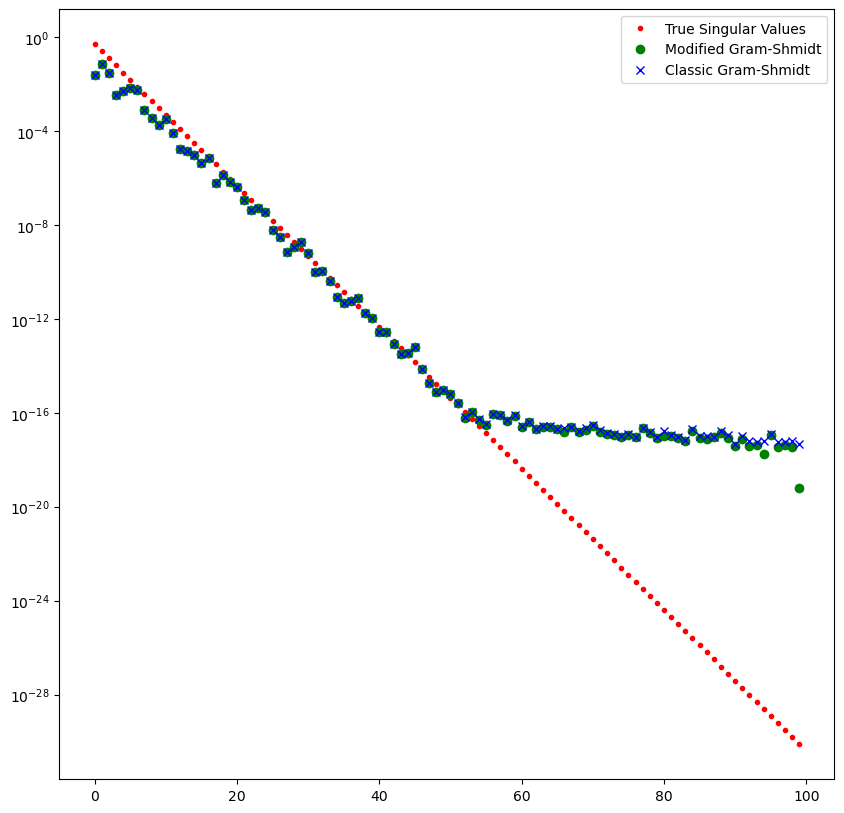

In [17]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [20]:
import numpy as np

def qr_decomposition(A):
    n = A.shape[0]
    Q = np.eye(n)
    
    for i in range(n - 1):
        # Compute Householder transformation matrix
        x = A[i:, i]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x))[:, 0]
        v = v / np.linalg.norm(v)
        H = np.eye(n)
        H[i:, i:] -= 2.0 * np.outer(v, v)
        
        # Update A and Q
        A = np.dot(H, A)
        Q = np.dot(Q, H)
    
    return Q, A

def qr_algorithm(A, iterations):
    n = A.shape[0]
    
    for i in range(iterations):
        Q, R = qr_decomposition(A)
        
        # Update A with R * Q
        A = np.dot(R, Q)
        
        # Print eigenvalues at specified iterations
        if i + 1 == 100:
            eigenvalues = np.diag(A)
            print(f"Iteration 1,5,10,20,100: {eigenvalues}")

In [22]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])

print("\n --- code ---")
iterations = 100
qr_algorithm(A, iterations)

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- code ---
Iteration 1,5,10,20,100: [ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

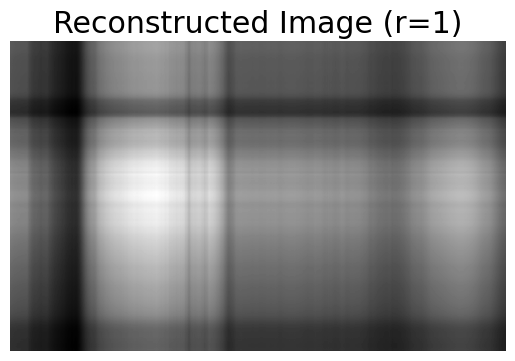

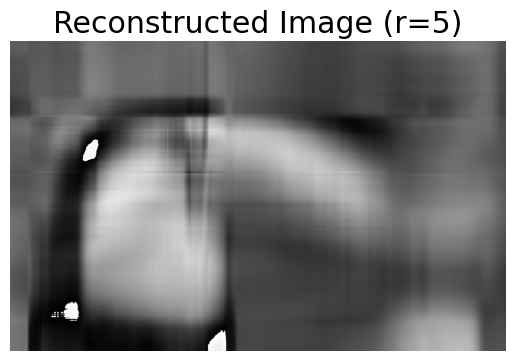

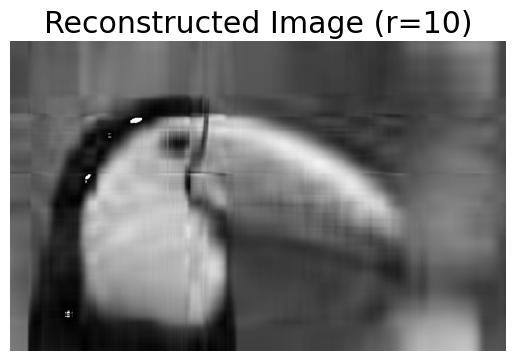

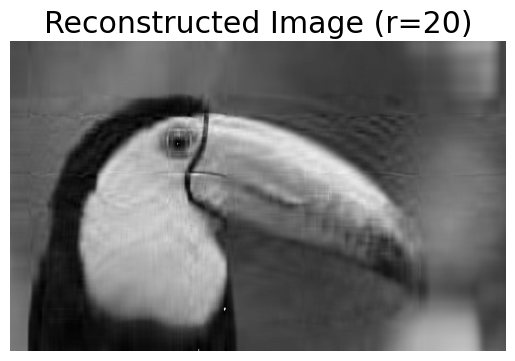

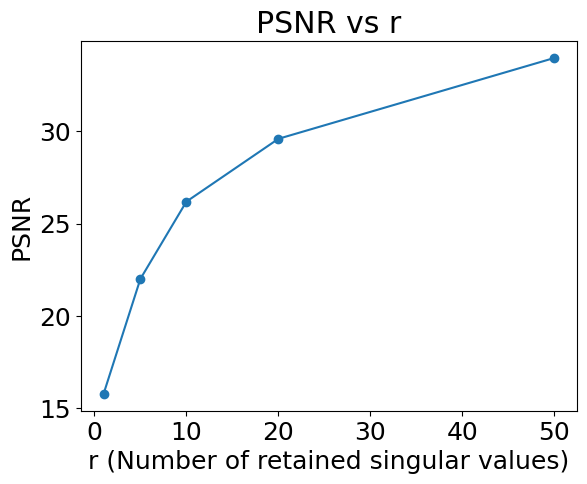

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def svd_compression(image_path, r_values):
    # Load the image
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    original_matrix = np.array(original_image)

    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(original_matrix, full_matrices=False)

    # Initialize PSNR list
    psnr_values = []

    for r in r_values:
        # Truncate singular values and reconstruct the image
        truncated_U = U[:, :r]
        truncated_Sigma = np.diag(Sigma[:r])
        truncated_Vt = Vt[:r, :]
        reconstructed_matrix = np.dot(truncated_U, np.dot(truncated_Sigma, truncated_Vt))

        # Calculate MSE and PSNR
        mse = np.mean((original_matrix - reconstructed_matrix) ** 2)
        psnr = 10 * np.log10((255**2) / mse)
        psnr_values.append(psnr)

        # Display the reconstructed image for the first few r values
        if r in [1, 5, 10, 20]:
            reconstructed_image = Image.fromarray(reconstructed_matrix.astype(np.uint8))
            plt.figure()
            plt.title(f'Reconstructed Image (r={r})')
            plt.imshow(reconstructed_image, cmap='gray')
            plt.axis('off')
            plt.show()

    # Plot the PSNR diagram
    plt.figure()
    plt.plot(r_values, psnr_values, marker='o')
    plt.title('PSNR vs r')
    plt.xlabel('r (Number of retained singular values)')
    plt.ylabel('PSNR')
    plt.show()

# Test the function with the provided image 'pic.jpg'
image_path = 'pic.jpg'
r_values_to_test = [1, 5, 10, 20, 50]
svd_compression(image_path, r_values_to_test)


###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


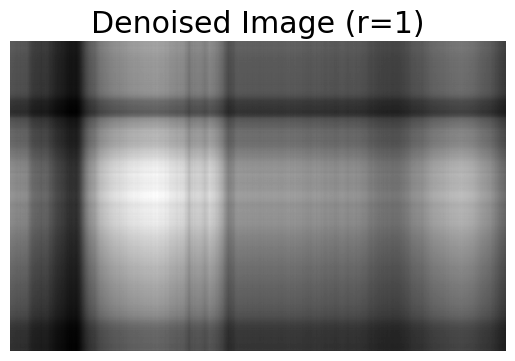

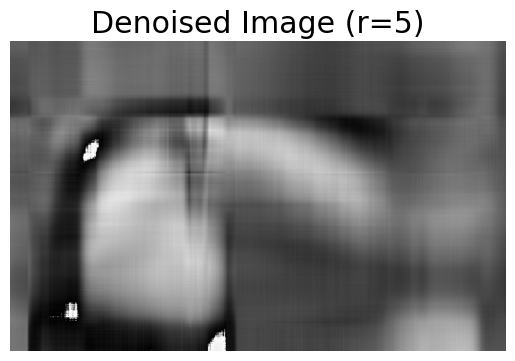

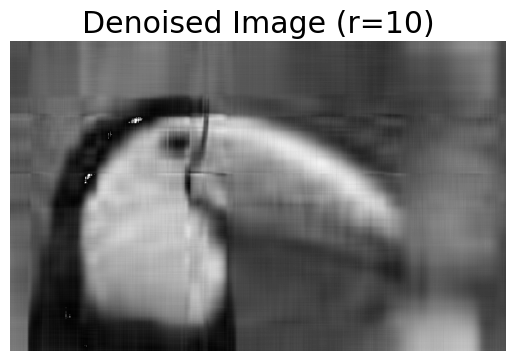

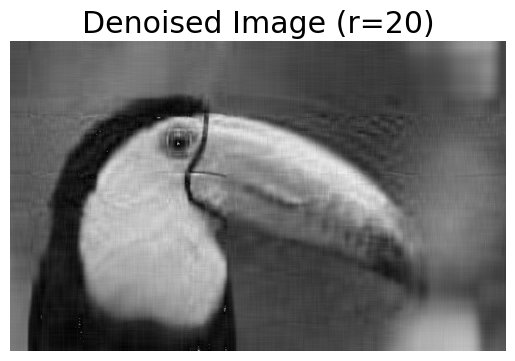

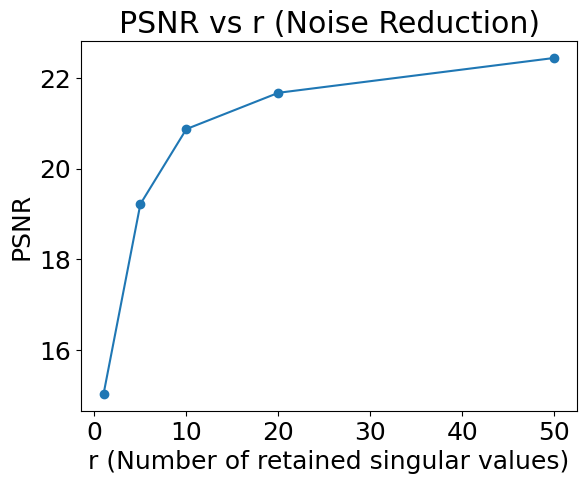

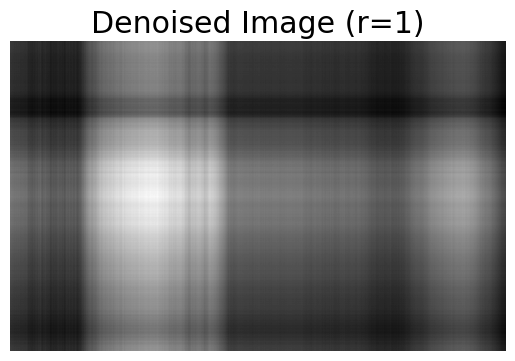

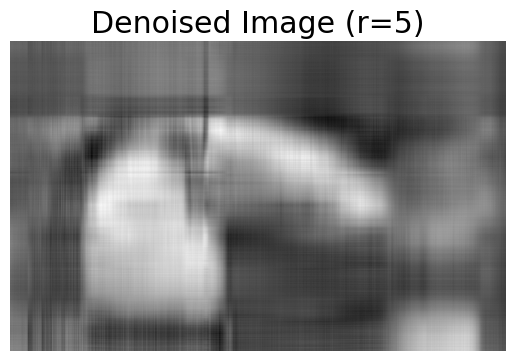

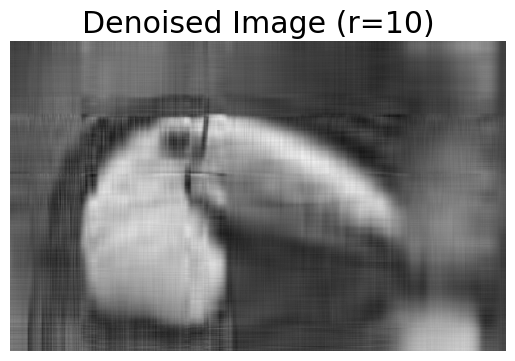

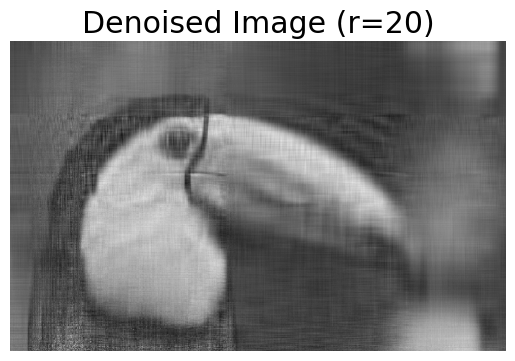

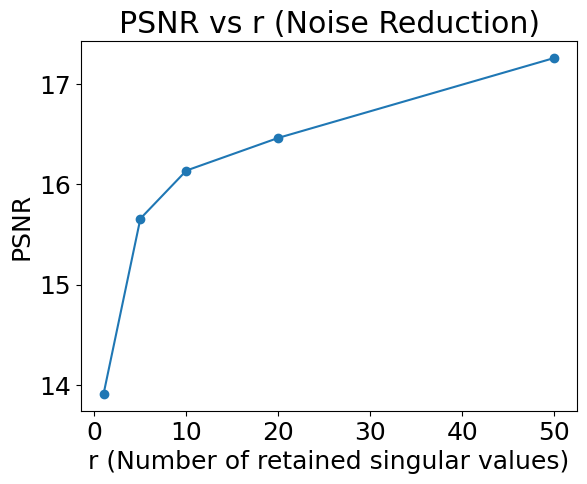

as we can see the first method which we used here worked better by increasing the r


In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean, std_dev):
    noisy_image = np.copy(image)
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image += noise.astype(np.uint8)

    # Clip values to [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image

def svd_noise_reduction(noisy_image, r_values):
    # Perform SVD on noisy image
    U, Sigma, Vt = np.linalg.svd(noisy_image, full_matrices=False)

    # Initialize PSNR list
    psnr_values = []

    for r in r_values:
        # Truncate singular values and reconstruct the denoised image
        truncated_U = U[:, :r]
        truncated_Sigma = np.diag(Sigma[:r])
        truncated_Vt = Vt[:r, :]
        denoised_image = np.dot(truncated_U, np.dot(truncated_Sigma, truncated_Vt))

        # Calculate MSE and PSNR
        mse = np.mean((noisy_image - denoised_image) ** 2)
        psnr = 10 * np.log10((255**2) / mse)
        psnr_values.append(psnr)

        # Display the denoised image for the first few r values
        if r in [1, 5, 10, 20]:
            denoised_image = Image.fromarray(denoised_image.astype(np.uint8))
            plt.figure()
            plt.title(f'Denoised Image (r={r})')
            plt.imshow(denoised_image, cmap='gray')
            plt.axis('off')
            plt.show()

    # Plot the PSNR diagram
    plt.figure()
    plt.plot(r_values, psnr_values, marker='o')
    plt.title('PSNR vs r (Noise Reduction)')
    plt.xlabel('r (Number of retained singular values)')
    plt.ylabel('PSNR')
    plt.show()

# Load the original image
original_image = Image.open('pic.jpg').convert('L')

# Add salt and pepper noise
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(np.array(original_image), salt_prob=0.01, pepper_prob=0.01)

# Add Gaussian noise
gaussian_noisy_image = add_gaussian_noise(np.array(original_image), mean=0, std_dev=25)

# Test noise reduction for both types of noise
r_values_to_test = [1, 5, 10, 20, 50]
svd_noise_reduction(salt_and_pepper_noisy_image, r_values_to_test)
svd_noise_reduction(gaussian_noisy_image, r_values_to_test)

print("as we can see the first method which we used here worked better by increasing the r")


##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [31]:
!pip install yellowbrick

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/282.6 kB 1.3 MB/s eta 0:00:01
     ---- ---------------------------------- 30.7/282.6 kB 1.3 MB/s eta 0:00:01
     -------- ---------------------------- 61.4/282.6 kB 465.5 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 652.2 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/282.6 kB 654.6 kB/s eta 0:00:01
     ------------------------------ ----- 235.5/282.6 kB 846.9 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 870.2 kB/s eta 0:00:00


### Import Dataset

In [32]:
Datapoint = pd.read_csv('Datapoint.csv')
Datapoint

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

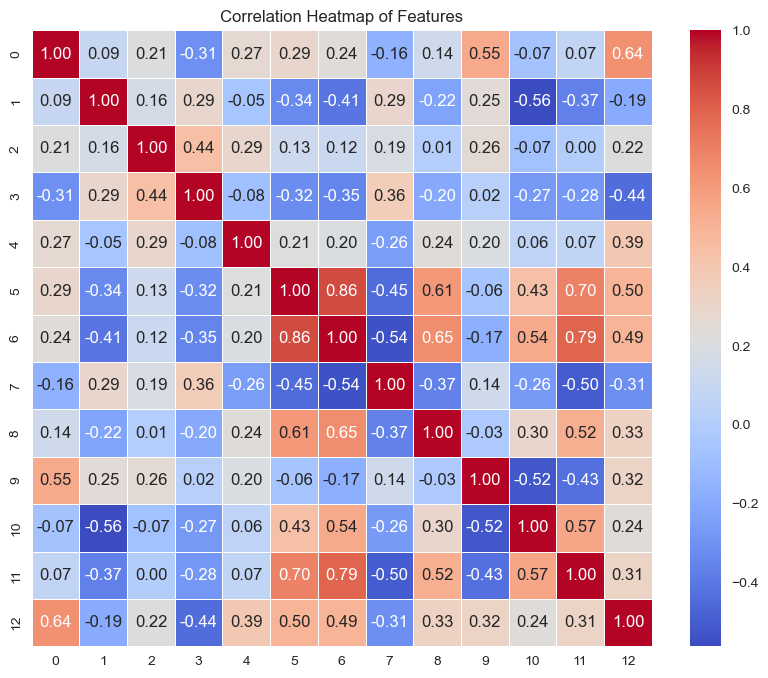

the each two features which have highter amount of correlation means they are more conected to each other in positive or negetive way 


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# Plot correlation heatmap
correlation_matrix = datapoint.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

print("the each two features which have highter amount of correlation means they are more conected to each other in positive or negetive way ")
print("and as we can see features 2 and 4 are useless and they have 3 less relation with others. generaly it appers that there are 7 important features")

###  Data Preprocessing

In [35]:
Datapoint.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

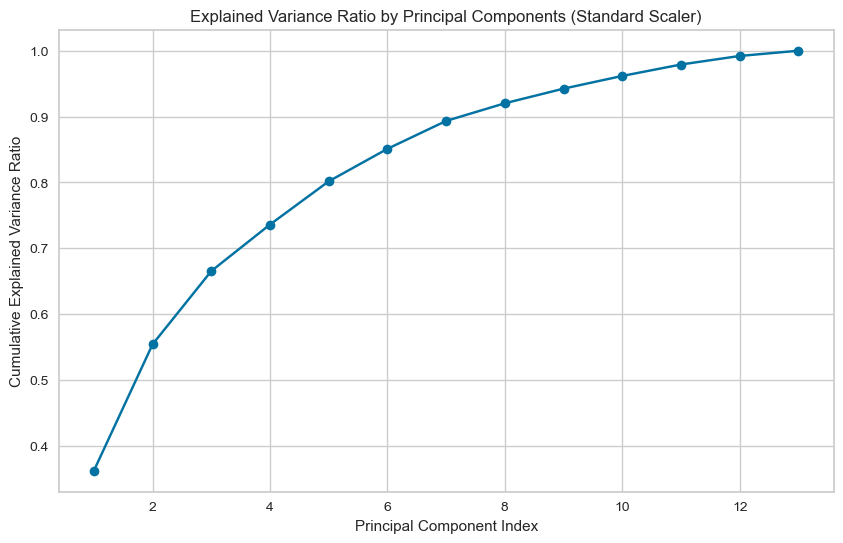

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# Standardize the data using Standard Scaler
scaler = StandardScaler()
datapoint_standardized = scaler.fit_transform(datapoint)

# Calculate the covariance matrix
covariance_matrix = np.cov(datapoint_standardized, rowvar=False)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot explained variance by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Principal Component Index')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components (Standard Scaler)')
plt.grid(True)
plt.show()


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

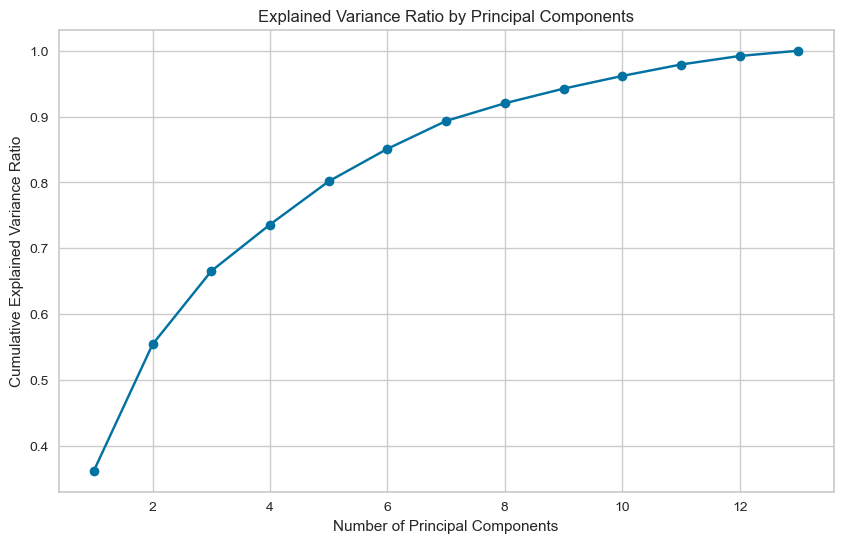

Reduced Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1  2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2  2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3  3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4  1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   

        PC8       PC9      PC10  
0  0.065139  0.641443  1.020956  
1  1.024416 -0.308847  0.159701  
2 -0.344216 -1.177834  0.113361  
3  0.643593  0.052544  0.239413  
4  0.416700  0.326819 -0.078366  


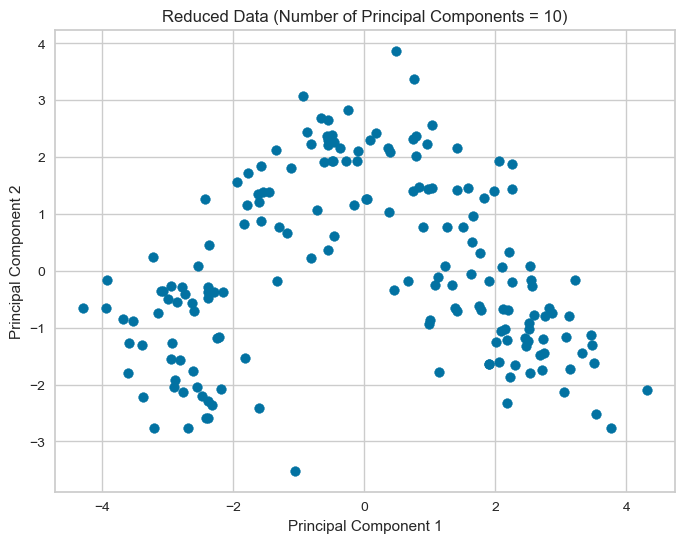

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# Standardize the data using Standard Scaler
scaler = StandardScaler()
datapoint_standardized = scaler.fit_transform(datapoint)

# Apply PCA to calculate explained variance
pca = PCA()
explained_variance = pca.fit(datapoint_standardized).explained_variance_ratio_

# Plot explained variance by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components based on a threshold (e.g., 95% variance explained)
threshold_variance = 0.95
num_principal_components = np.argmax(np.cumsum(explained_variance) >= threshold_variance) + 1

# Reduce dimensionality based on the determined number of components
pca = PCA(n_components=num_principal_components)
reduced_data = pca.fit_transform(datapoint_standardized)

# Display the reduced data
reduced_data_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i+1}' for i in range(num_principal_components)])
print("Reduced Data:")
print(reduced_data_df.head())

# Plot the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title(f'Reduced Data (Number of Principal Components = {num_principal_components})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("as we see 10 is not that much far from what we gussed")


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

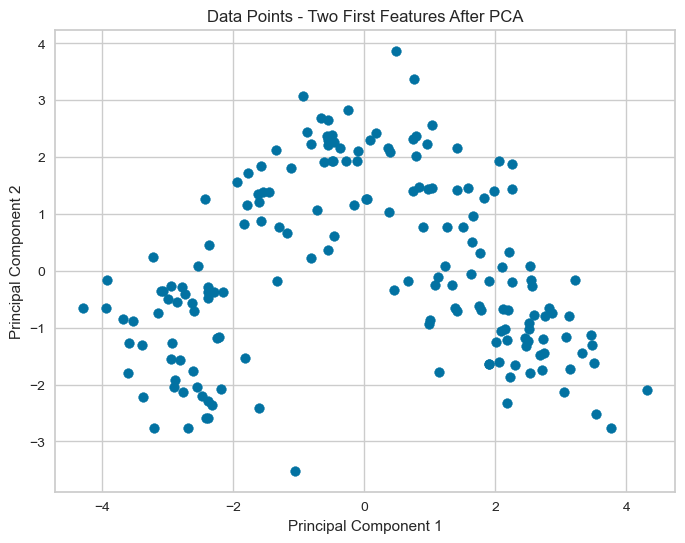

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# Standardize the data using Standard Scaler
scaler = StandardScaler()
datapoint_standardized = scaler.fit_transform(datapoint)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(datapoint_standardized)

# Plot data points using their two first features
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data Points - Two First Features After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print("it seems it have two or three parts")


### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




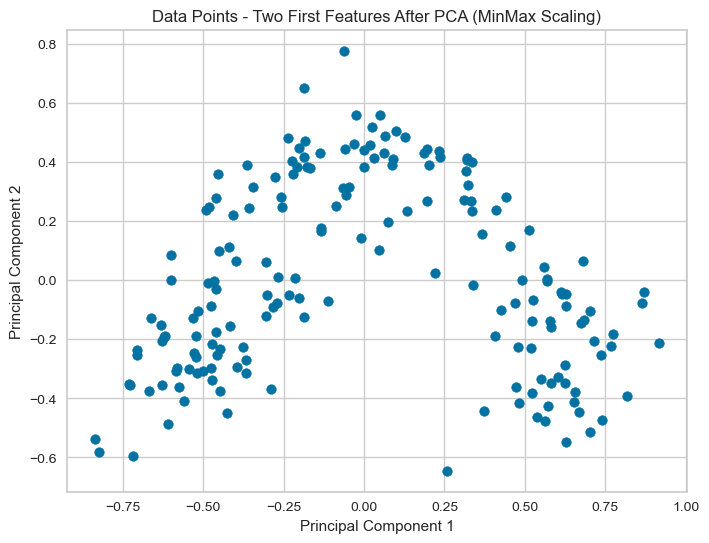

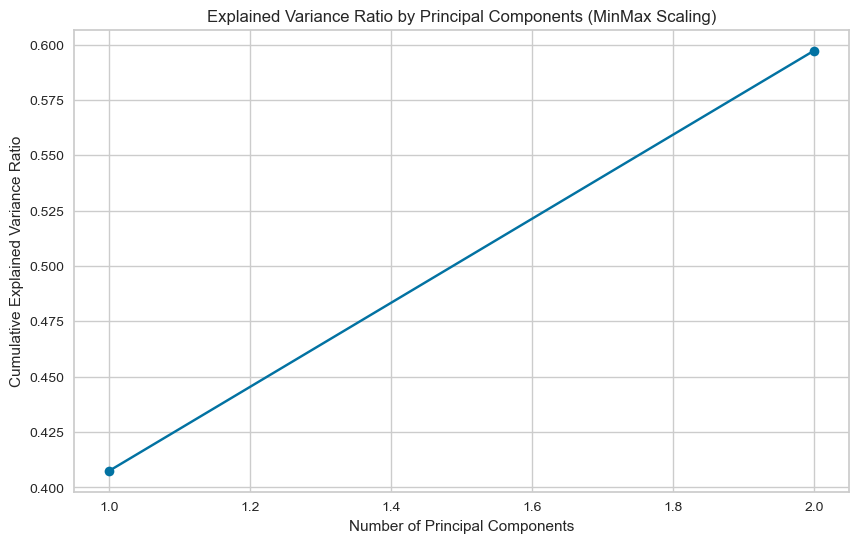

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# MinMax Scaling
scaler = MinMaxScaler()
datapoint_scaled = scaler.fit_transform(datapoint)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(datapoint_scaled)

# Plot data points using their two first features after MinMax Scaling
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('Data Points - Two First Features After PCA (MinMax Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Calculate explained variance using MinMax Scaled data
explained_variance_minmax = pca.explained_variance_ratio_

# Plot explained variance by each component (MinMax Scaling)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_minmax) + 1), np.cumsum(explained_variance_minmax), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components (MinMax Scaling)')
plt.grid(True)
plt.show()

print("as we can see they preform same but in pca we saw a better 2D clasification")


### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

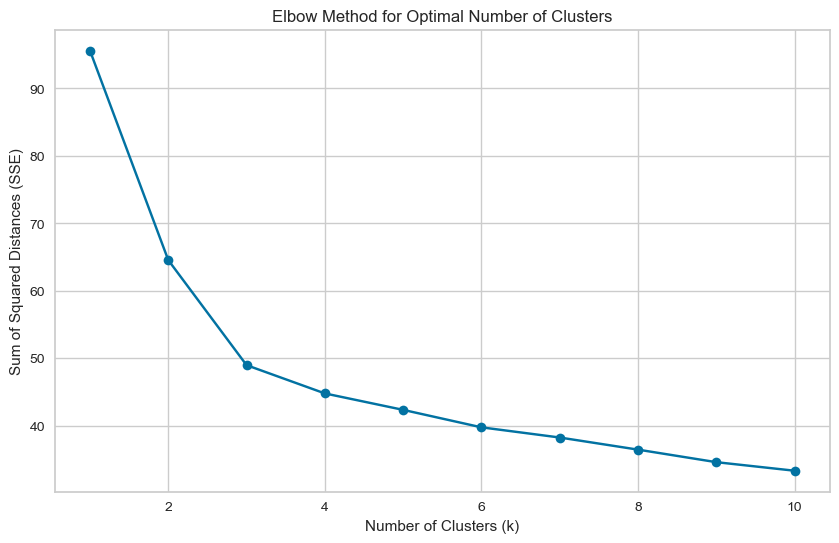

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# MinMax Scaling
scaler = MinMaxScaler()
datapoint_scaled = scaler.fit_transform(datapoint)

# Calculate the sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(datapoint_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

print("as we can see the optimal and elbow point is 3 or 4 or 2")


What is inertia and silhouette metrics?
Explain them briefly.




In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm

# Load the data
datapoint = pd.read_csv('Datapoint.csv', header=None)

# Standardize the data using Standard Scaler
scaler = StandardScaler()
datapoint_standardized = scaler.fit_transform(datapoint)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_std_datapoint = pca.fit_transform(datapoint_standardized)

#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

  0%|          | 0/8 [00:00<?, ?it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:05,  1.23it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:04,  1.23it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00

In [46]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

  0%|          | 0/8 [00:00<?, ?it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:05,  1.23it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:04,  1.24it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00

Plot the **inertia** and **silhouette ** values

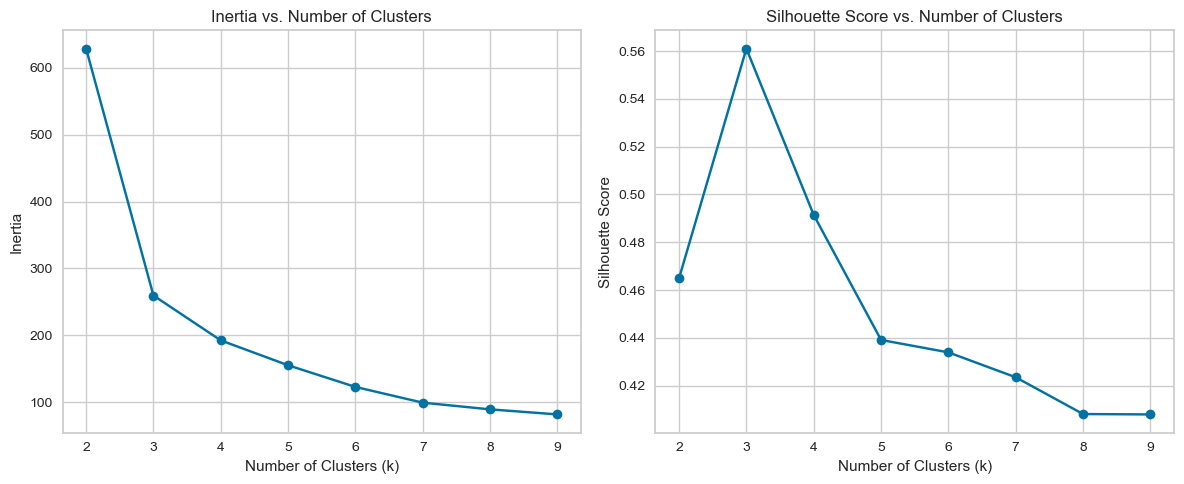

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score as sil
from tqdm import tqdm

# Assuming you have already obtained the 'inertia' and 'silhouette' dictionaries

# Plotting Inertia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), list(silhouette.values()), marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Tune the hyper parameters based on your conclusions.

In [50]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

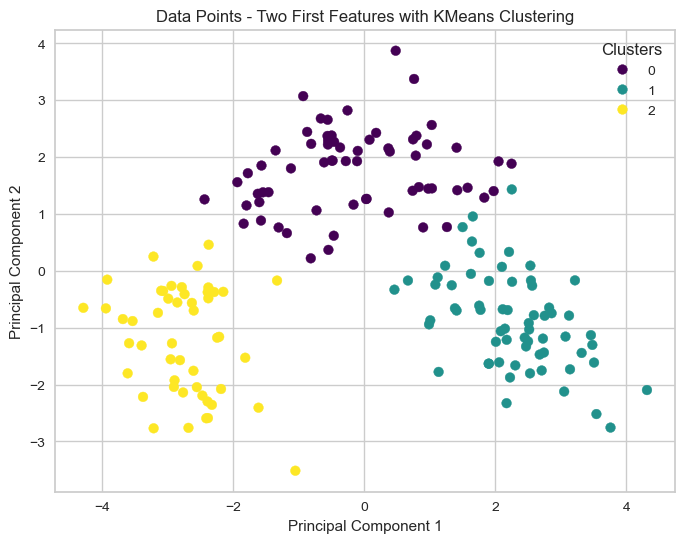

In [51]:
import matplotlib.pyplot as plt

# Assuming you have already obtained 'y_predict_kmeans1' from KMeans clustering

# Plot data points using two first features and color by clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap='viridis')
plt.title('Data Points - Two First Features with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()


Do all previous steps for MinMax scaled data points.





  0%|          | 0/8 [00:00<?, ?it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:05,  1.18it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:05,  1.20it/s]D:\phyton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00

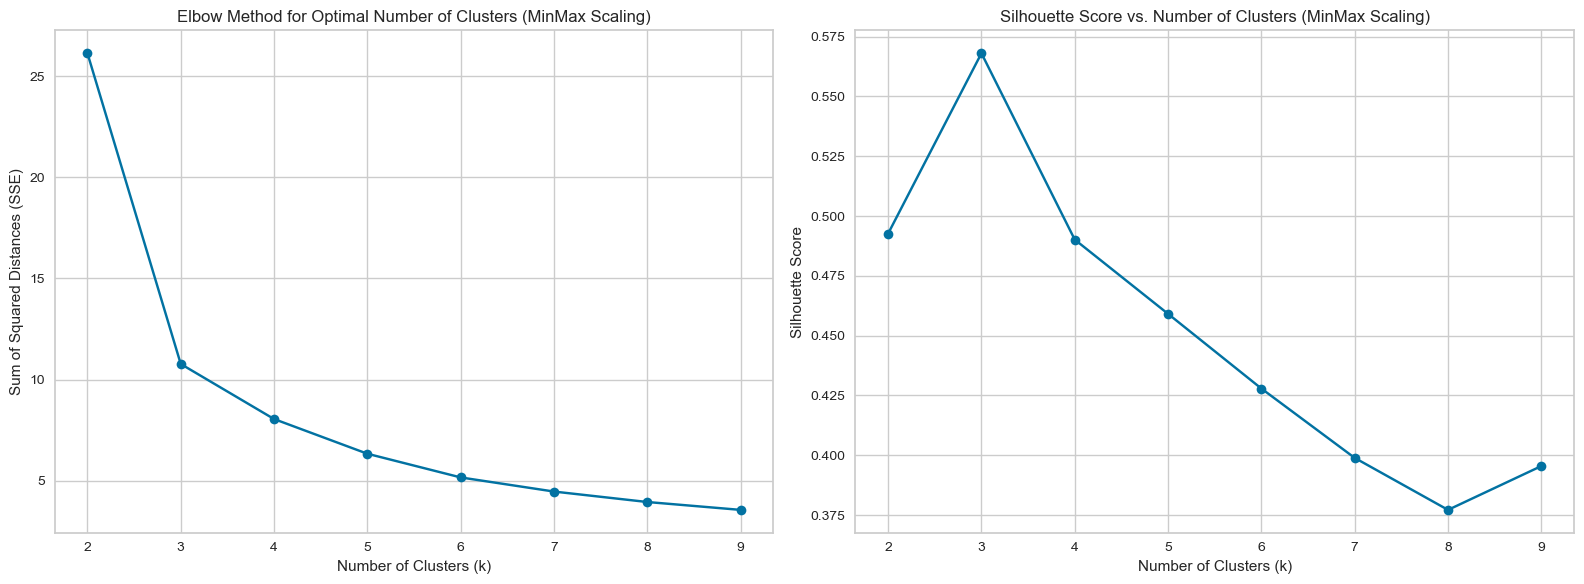

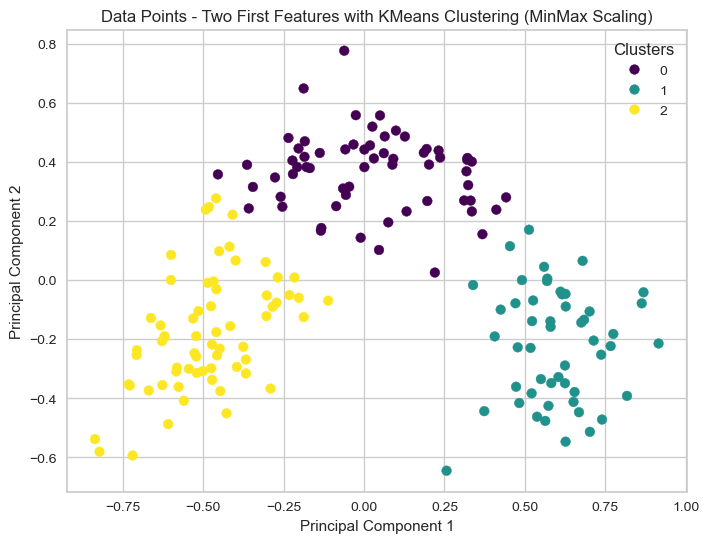

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score as sil
from tqdm import tqdm

# Assuming you have already obtained the 'inertia_minmax', 'y_predict_kmeans_minmax', and 'pca_minmax_datapoint' variables

# Plotting Inertia and Silhouette Score
plt.figure(figsize=(16, 6))

# Plotting Inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia_minmax, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (MinMax Scaling)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
silhouette_minmax = []
for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    y_predict = kmeans.fit_predict(pca_minmax_datapoint)
    silhouette_minmax.append(sil(pca_minmax_datapoint, y_predict, metric='euclidean'))

plt.plot(range(2, 10), silhouette_minmax, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (MinMax Scaling)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Plot data points using two first features and color by clusters (MinMax Scaling)
plt.figure(figsize=(8, 6))
scatter_minmax = plt.scatter(pca_minmax_datapoint[:, 0], pca_minmax_datapoint[:, 1], c=y_predict_kmeans_minmax, cmap='viridis')
plt.title('Data Points - Two First Features with KMeans Clustering (MinMax Scaling)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter_minmax.legend_elements(), title='Clusters')
plt.grid(True)
plt.show()



Compare the results of different scaling methods in a PCA problem

In [54]:
print("\n as we can see both methods gave the same clustreing and they are very much similar")
print("\n Inertia, measures the sum of squared distances between each data point in a cluster and the centroid of that cluster. and we want to minimize it so in each cluster components be more closer to each other")
print("\n The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. in each group we are searching for numbers near 1. number 0 is boundry and negtives are out of range")



 as we can see both methods gave the same clustreing and they are very much similar

 Inertia, measures the sum of squared distances between each data point in a cluster and the centroid of that cluster. and we want to minimize it so in each cluster components be more closer to each other

 The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. in each group we are searching for numbers near 1. number 0 is boundry and negtives are out of range
